# 워드 클라우드

- 한빛출판 네트워크 > 새로 나온책 (200권)> TAG 

- TAG를 워드 클라우드로 만들기

### 1. 크롤링 

In [30]:
import requests, re
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [31]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/store/books/new_book_list.html'
url = base_url + sub_url
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

In [32]:
lis = soup.select('.sub_book_list')
len(lis)

20

In [33]:
li = lis[0]
href = li.find('a')['href']
href

'/store/books/look.php?p_code=B2831223974'

In [34]:
res = requests.get(base_url + href)
book_soup = BeautifulSoup(res.text, 'html.parser')

In [35]:
tags=book_soup.select('.tag_area > a')
len(tags)

14

In [36]:
tag_list=[]
for a in tags:
    tag_list.append(a.get_text().strip())
print(tag_list)

['파이썬', '엑셀', 'VBA', '셀수식', '엑셀 자동화', '판다스', '파워 쿼리', '파워 피벗', '아나콘다 파이썬', '주피터 노트북', '비주얼 스튜디오 코드', '넘파이', '사용자 정의 함수', 'UDF']


In [38]:
tag_list = []
for page in tqdm(range(1,11)):
    url = f'{base_url}{sub_url}?page={page}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis = soup.select('.sub_book_list')

    for li in lis:
        book_url = li.find('a')['href']
        res = requests.get(base_url + book_url)
        book_soup=BeautifulSoup(res.text,'html.parser')
        tags=book_soup.select('.tag_area > a')
        for a in tags:
            tag_list.append(a.get_text().strip())      

  0%|          | 0/10 [00:00<?, ?it/s]

In [19]:
tag_list[:10]

NameError: name 'tag_list' is not defined

In [40]:
len(tag_list)

2430

- tag_list 를 frequency dictionary 로 만들기

In [41]:
tag_set=set(tag_list)
len(tag_set)

1510

In [42]:
tag_dict={item:tag_list.count(item) for item in tag_set}
 #for item in tag_set:
   # tag_dict[item]=tag_list.count(item)

In [43]:
count=0
for key, val in tag_dict.items():
    print(key,':',val)
    count += 1
    if count > 5:
        break

 : 1
복소함수 : 2
카카오뱅크 : 1
현장밀착형 입문서 : 1
코로나 : 1
DIP : 1


- 워드 클라우드 그리기 

In [44]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.family']='Malgun Gothic'

In [46]:
wc=WordCloud(width=1000,height=600,background_color='white',
            random_state=2022,
            font_path='c:/windows/fonts/malgun.ttf')
wc=wc.generate_from_frequencies(tag_dict)

<function matplotlib.pyplot.show(close=None, block=None)>

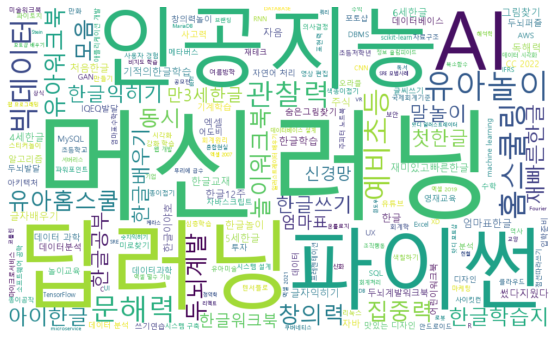

In [47]:
plt.figure(figsize=(10,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show

단어를 펼쳐서 워드 클라우드 만들기 

In [48]:
tag_text=' '.join(tag_list)

In [50]:
wc=WordCloud(width=1000,height=600,background_color='white',
            random_state=2022,
            font_path='c:/windows/fonts/malgun.ttf')
wc=wc.generate(tag_text)

<function matplotlib.pyplot.show(close=None, block=None)>

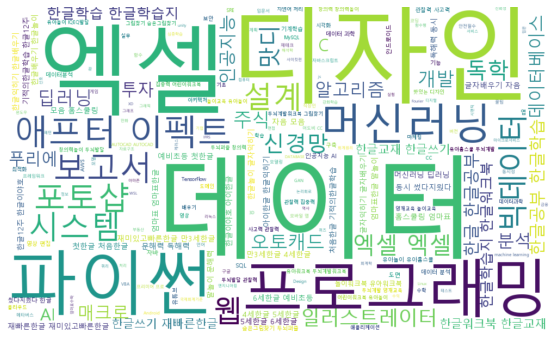

In [51]:
plt.figure(figsize=(10,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show